# Mitiq QCS Data Analysis

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas

from mitiq.zne.inference import ExpFactory, ExtrapolationError, LinearFactory, PolyFactory, RichardsonFactory

## Load the Data

In [2]:
df = pandas.read_csv('data/qcs-aspen-8-32-33-rb.csv', index_col=0)
df

,trial,scale_factor,expectation
0,0,1.0,0.7749
1,0,1.5,0.6520
2,0,2.0,0.6409
3,0,2.5,0.6729
4,0,3.0,0.6382
...,...,...,...
545,49,4.0,0.2693
546,49,4.5,0.2701
547,49,5.0,0.2171
548,49,5.5,0.2250


In [3]:
scales = df.scale_factor
expectations = df.expectation

## Extrapolate the Trials

In [4]:
scale_factors = np.unique(scales)
n = len(scale_factors)
scale_factors

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ])

In [5]:
def truncate(array):
    return array[::3]

truncate(scale_factors)

array([1. , 2.5, 4. , 5.5])

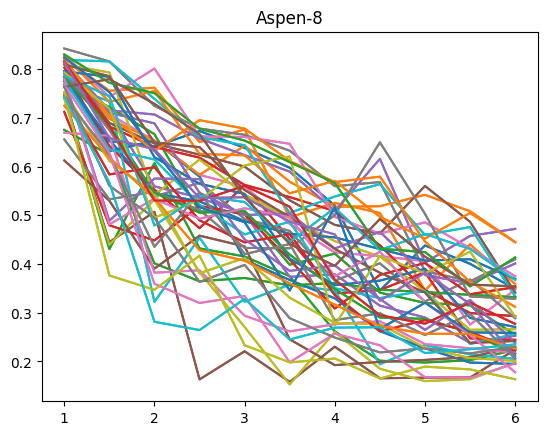

In [7]:
"""View the raw noise curves."""
start = 0
stop = 50
for i in range(start, stop):
    plt.plot(scale_factors, expectations[i*n:(i+1)*n])
plt.title("Aspen-8");
plt.show()

In [8]:
len(scale_factors)

11

In [9]:
np.array(expectations)

array([0.7749, 0.652 , 0.6409, 0.6729, 0.6382, 0.5975, 0.5201, 0.3454,
       0.4379, 0.4003, 0.3484, 0.8228, 0.7555, 0.7618, 0.6501, 0.676 ,
       0.4957, 0.5254, 0.5046, 0.3456, 0.4402, 0.3586, 0.745 , 0.4304,
       0.6069, 0.4319, 0.4154, 0.3747, 0.2615, 0.2014, 0.1977, 0.2025,
       0.2236, 0.7958, 0.6423, 0.5527, 0.4735, 0.5621, 0.4509, 0.3394,
       0.3465, 0.3831, 0.2472, 0.2443, 0.7852, 0.7129, 0.5593, 0.5359,
       0.503 , 0.3736, 0.3786, 0.3144, 0.2901, 0.2379, 0.2527, 0.7425,
       0.4447, 0.507 , 0.163 , 0.2208, 0.1578, 0.2302, 0.1654, 0.1665,
       0.1668, 0.2242, 0.814 , 0.7074, 0.6529, 0.5829, 0.5584, 0.4822,
       0.4237, 0.416 , 0.4057, 0.2754, 0.3477, 0.8423, 0.8157, 0.7245,
       0.678 , 0.6651, 0.6325, 0.5595, 0.5681, 0.3855, 0.3644, 0.4096,
       0.7395, 0.4397, 0.5322, 0.3828, 0.2706, 0.1526, 0.2603, 0.1849,
       0.1595, 0.1634, 0.1974, 0.7693, 0.7335, 0.3221, 0.4539, 0.3225,
       0.3576, 0.345 , 0.194 , 0.2337, 0.2142, 0.2051, 0.7918, 0.6317,
      

In [10]:
exps = [expectations[i*n:(i+1)*n] for i in range(50)]

In [11]:
exps = np.array(exps)

In [12]:
plt.plot(scale_factors, np.average(exps, axis=0))

In [13]:
failures = 0

factories = {
    "exponential": ExpFactory(scale_factors=scale_factors),
    "linear": LinearFactory(scale_factors=scale_factors),
    "poly order 2": PolyFactory(order=2, scale_factors=scale_factors),
}

extrapolations = []

for i in range(50):
    extrapolations_dict = {}
    trial_expectations = expectations[i*n:(i+1)*n]

    try:
        for name, fac in factories.items():
            for e, s in zip(trial_expectations, scale_factors):
                fac.push({"scale_factor": s}, e)
            result = fac.reduce()
            extrapolations_dict[name] = result

        name = "truncated richardson (first 3)"
        fac = RichardsonFactory(scale_factors=scale_factors)
        for e, s in zip(truncate(trial_expectations), truncate(scale_factors)):
            fac.push({"scale_factor": s}, e)
        result = fac.reduce()
        extrapolations_dict[name] = result

    except ExtrapolationError:
        failures += 1
        continue

    extrapolations.append(extrapolations_dict)

/Users/nathanshammah/github/mitiq/mitiq/zne/inference.py:342: ExtrapolationWarning: You are pushing new data into a factory object despite its .reduce() method has already been called. Please make sure your intention is to append new data to the stack of previous data. Otherwise, the method .reset() can be used to clean the internal state of the factory.
  warnings.warn(
/Users/nathanshammah/github/mitiq/mitiq/zne/inference.py:342: ExtrapolationWarning: You are pushing new data into a factory object despite its .reduce() method has already been called. Please make sure your intention is to append new data to the stack of previous data. Otherwise, the method .reset() can be used to clean the internal state of the factory.
  warnings.warn(
/Users/nathanshammah/github/mitiq/mitiq/zne/inference.py:342: ExtrapolationWarning: You are pushing new data into a factory object despite its .reduce() method has already been called. Please make sure your intention is to append new data to the stack 

In [14]:
failures

3

In [15]:
df_extrapolations = pandas.DataFrame(extrapolations)
df_extrapolations

,exponential,linear,poly order 2,truncated richardson (first 3)
0,0.887785,0.911544,0.961089,0.968798
1,0.892378,0.812307,0.925327,1.048468
2,0.999677,0.738089,0.963263,1.871963
3,0.999147,0.766181,0.964714,1.038135
4,0.982967,0.801362,0.959517,1.037722
5,1.005368,0.777208,0.964080,1.210423
6,1.030397,0.771547,0.972473,1.207079
7,1.028478,0.781263,0.977137,0.835573
8,1.024613,0.782673,0.967981,1.118781
9,1.023059,0.787825,0.968779,1.132332


In [16]:
extrapolations_mean = np.mean(df_extrapolations, axis=0)
extrapolations_mean

exponential                       0.984783
linear                            0.792113
poly order 2                      0.936060
truncated richardson (first 3)    1.047217
dtype: float64

In [17]:
extrapolations_std = np.std(df_extrapolations, axis=0)
extrapolations_std

exponential                       0.025154
linear                            0.022376
poly order 2                      0.019335
truncated richardson (first 3)    0.247257
dtype: float64

In [18]:
expectations_mean = [np.mean(expectations[i::n]) for i in range(n)]
expectations_std = np.array([np.std(expectations[i::n]) for i in range(n)])

## Plot the Data

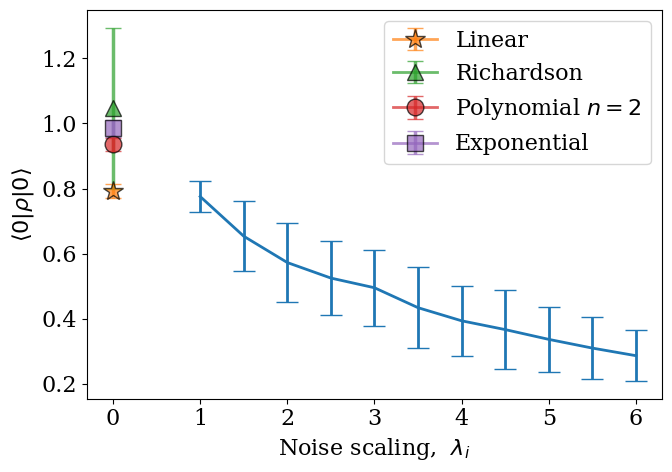

In [21]:
plt.rcParams.update({"font.family": "serif", "font.size": 16})
plt.figure(figsize=(7, 5));

# plot the mean and std of all the data
plt.errorbar(scale_factors, expectations_mean, yerr=expectations_std, lw=2, capsize=8)

# plot the extrapolations
plt.errorbar(0, extrapolations_mean[1], extrapolations_std[1], lw=2, capsize=6, alpha=0.7, elinewidth=2.5, capthick=4,
             marker="*", markersize=15, markeredgecolor="k", markeredgewidth=1, label=f"Linear")

plt.errorbar(0, extrapolations_mean[-1], extrapolations_std[-1], lw=2, capsize=6, alpha=0.7, elinewidth=2.5, capthick=4,
             marker="^", markersize=12, markeredgecolor="k", markeredgewidth=1, label=f"Richardson")

plt.errorbar(0, extrapolations_mean[2], extrapolations_std[2], lw=2, capsize=6, alpha=0.7, elinewidth=2.5, capthick=4,
             marker="o", markersize=12, markeredgecolor="k", markeredgewidth=1, label=f"Polynomial $n=2$")

plt.errorbar(0, extrapolations_mean[0], extrapolations_std[0], lw=2, capsize=6, alpha=0.7, elinewidth=2.5, capthick=4,
             marker="s", markersize=12, markeredgecolor="k", markeredgewidth=1, label=f"Exponential")

plt.legend()
plt.xlabel("Noise scaling, $\ \lambda_i$");
plt.ylabel(r"$ \langle 0 | \rho | 0 \rangle $");
plt.tight_layout()
#plt.savefig("QCS-Aspen-8-32-33-RB.pdf")
#plt.savefig("Figure2b.pdf")
plt.show()
plt.close()

In [24]:
from mitiq import about

about()


Mitiq: A Python toolkit for implementing error mitigation on quantum computers
Authored by: Mitiq team, 2020 & later (https://github.com/unitaryfund/mitiq)

Mitiq Version:	0.10.0dev

Core Dependencies
-----------------
Cirq Version:	0.10.0
NumPy Version:	1.20.3
SciPy Version:	1.4.1

Optional Dependencies
---------------------
PyQuil Version:	2.28.1
Qiskit Version:	None
Braket Version:	1.5.16

Python Version:	3.8.0
Platform Info:	Darwin (x86_64)
